#Deep learning multi-classification



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn


In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import keras
print("Keras version:", keras.__version__)

TensorFlow version: 2.17.0
Keras version: 3.4.1


In [3]:
!unzip dataset.zip -d images

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: images/dataset/training_set/gato/cat.1946.jpg  
  inflating: images/dataset/training_set/gato/cat.563.jpg  
  inflating: images/dataset/training_set/gato/cat.1601.jpg  
  inflating: images/dataset/training_set/gato/cat.1167.jpg  
  inflating: images/dataset/training_set/gato/cat.1173.jpg  
  inflating: images/dataset/training_set/gato/cat.1615.jpg  
  inflating: images/dataset/training_set/gato/cat.1629.jpg  
  inflating: images/dataset/training_set/gato/cat.359.jpg  
  inflating: images/dataset/training_set/gato/cat.403.jpg  
  inflating: images/dataset/training_set/gato/cat.1826.jpg  
  inflating: images/dataset/training_set/gato/cat.1198.jpg  
  inflating: images/dataset/training_set/gato/cat.365.jpg  
  inflating: images/dataset/training_set/gato/cat.371.jpg  
  inflating: images/dataset/training_set/gato/cat.1832.jpg  
  inflating: images/dataset/training_set/gato/cat.417.jpg  
  inflating: images/dataset/trai

In [4]:
!pwd

/content


In [12]:
!ls /content/images/dataset/training_set/cachorro

dog.0.jpg     dog.1258.jpg  dog.1515.jpg  dog.1773.jpg	dog.22.jpg   dog.488.jpg  dog.745.jpg
dog.1000.jpg  dog.1259.jpg  dog.1516.jpg  dog.1774.jpg	dog.230.jpg  dog.489.jpg  dog.746.jpg
dog.1001.jpg  dog.125.jpg   dog.1517.jpg  dog.1775.jpg	dog.231.jpg  dog.48.jpg   dog.747.jpg
dog.1002.jpg  dog.1260.jpg  dog.1518.jpg  dog.1776.jpg	dog.232.jpg  dog.490.jpg  dog.748.jpg
dog.1003.jpg  dog.1261.jpg  dog.1519.jpg  dog.1777.jpg	dog.233.jpg  dog.491.jpg  dog.749.jpg
dog.1004.jpg  dog.1262.jpg  dog.151.jpg   dog.1778.jpg	dog.234.jpg  dog.492.jpg  dog.74.jpg
dog.1005.jpg  dog.1263.jpg  dog.1520.jpg  dog.1779.jpg	dog.235.jpg  dog.493.jpg  dog.750.jpg
dog.1006.jpg  dog.1264.jpg  dog.1521.jpg  dog.177.jpg	dog.236.jpg  dog.494.jpg  dog.751.jpg
dog.1007.jpg  dog.1265.jpg  dog.1522.jpg  dog.1780.jpg	dog.237.jpg  dog.495.jpg  dog.752.jpg
dog.1008.jpg  dog.1266.jpg  dog.1523.jpg  dog.1781.jpg	dog.238.jpg  dog.496.jpg  dog.753.jpg
dog.1009.jpg  dog.1267.jpg  dog.1524.jpg  dog.1782.jpg	dog.239.jpg  dog.

In [22]:
# prompt: count number of images cachorro and gatos

!ls /content/images/dataset/training_set/cachorro | wc -l
!ls /content/images/dataset/training_set/gato | wc -l


2000
2000


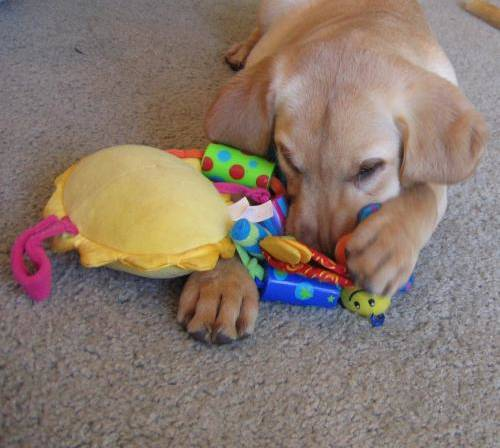

In [13]:
# see image
from IPython.display import Image
Image(filename='/content/images/dataset/training_set/cachorro/dog.782.jpg')


In [18]:
from PIL import Image
img = Image.open('/content/images/dataset/training_set/cachorro/dog.782.jpg')
print(img.format)
print(img.size)
print(img.mode)

JPEG
(500, 448)
RGB


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [50]:
multiclassificator = Sequential()
# standarlization image to 64x64, all images are different size
# 3 channel RGB
multiclassificator.add(InputLayer(shape=(64,64,3)))
multiclassificator.add(Conv2D(32, (3, 3), activation='relu'))
multiclassificator.add(BatchNormalization())
multiclassificator.add(MaxPooling2D(pool_size=(2, 2)))

multiclassificator.add(Conv2D(32, (3, 3), activation='relu'))
multiclassificator.add(BatchNormalization())
multiclassificator.add(MaxPooling2D(pool_size=(2, 2)))

multiclassificator.add(Flatten())
multiclassificator.add(Dense(128, activation='relu'))
multiclassificator.add(Dropout(0.2))
multiclassificator.add(Dense(1, activation='sigmoid'))
multiclassificator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 29, 29, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 813,473 (3.10 MB)

 Trainable params: 813,345 (3.10 MB)

 Non-trainable params: 128 (512.00 B)

In [51]:
multiclassificator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
# generate image augumentation
# more detail in link https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
generator_train = ImageDataGenerator(rescale=1./255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True)
generator_test = ImageDataGenerator(rescale=1./255)
base_train = generator_train.flow_from_directory('/content/images/dataset/training_set',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 4000 images belonging to 2 classes.


In [53]:
base_test = generator_test.flow_from_directory('/content/images/dataset/test_set',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [54]:
multiclassificator.fit(base_train, epochs=10, validation_data=base_test)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 49s 367ms/step - accuracy: 0.5933 - loss: 1.0891 - val_accuracy: 0.5030 - val_loss: 1.2781
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 46s 358ms/step - accuracy: 0.6779 - loss: 0.6091 - val_accuracy: 0.5480 - val_loss: 1.3395
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 83s 364ms/step - accuracy: 0.7096 - loss: 0.5634 - val_accuracy: 0.6130 - val_loss: 1.1288
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 46s 359ms/step - accuracy: 0.7308 - loss: 0.5470 - val_accuracy: 0.6170 - val_loss: 0.6560
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 45s 351ms/step - accuracy: 0.7431 - loss: 0.5130 - val_accuracy: 0.7120 - val_loss: 0.5510
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 42s 332ms/step - accuracy: 0.7615 - loss: 0.4861 - val_accuracy: 0.7100 - val_loss: 0.5712
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 82s 332ms/step - accuracy: 0.7825 - loss: 0.4651 - val_accuracy: 0.6580 - val_loss: 0.9597
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 83s 339ms/step - accuracy: 0.7810 - loss: 0.4509 - val

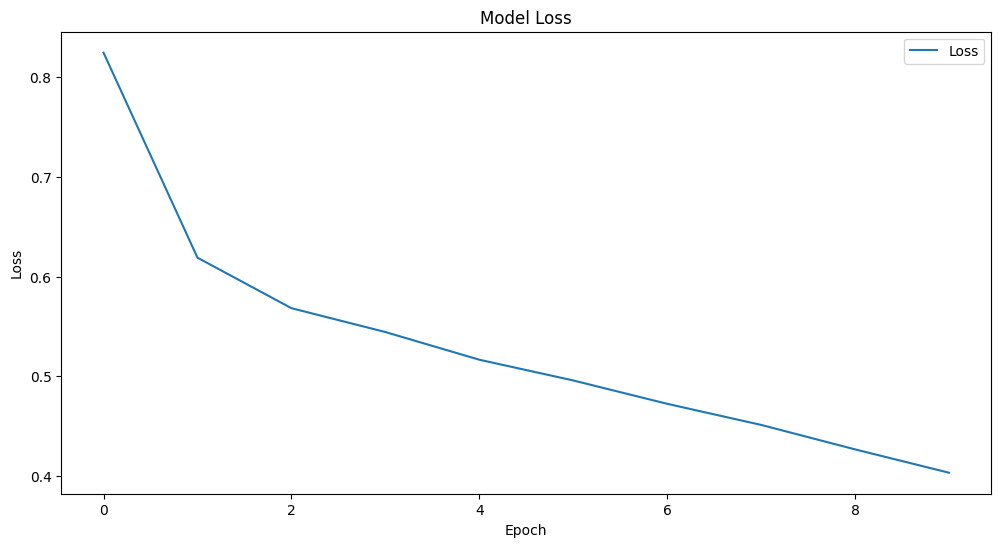

In [55]:

plt.figure(figsize=(12, 6))
plt.plot(multiclassificator.history.history['loss'], label='Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

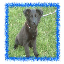

In [56]:
#lest test
image_test = image.load_img('/content/images/dataset/test_set/cachorro/dog.3505.jpg', target_size=(64, 64))
image_test

In [57]:
type(image_test)

PIL.Image.Image

In [58]:
# convert to array
image_test = image.img_to_array(image_test)
image_test

array([[[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.]],

       ...,

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 2

In [59]:
normalization = image_test / 255
normalization

array([[[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0

In [60]:
normalization.shape

(64, 64, 3)

In [61]:
# means it will send 1 image (expand_dims) 64x64 image in 3 channels
normalization = np.expand_dims(normalization, axis=0)
normalization.shape

(1, 64, 64, 3)

In [62]:
prediction = multiclassificator.predict(normalization)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[0.13922384]], dtype=float32)

In [63]:
prediction = (prediction > 0.5)
prediction

array([[False]])

In [64]:
base_train.class_indices

{'cachorro': 0, 'gato': 1}